In [72]:
#dataframe
import pandas as pd
#array
import numpy as np
#datavisualisatio
import matplotlib.pyplot as plt
import seaborn as sns 

In [73]:
#kmeans clustering algorithm
from sklearn.cluster import KMeans

#Data Collection and Analysis

In [74]:
df=pd.read_csv('/content/drive/MyDrive/machine_learning/unsupervised Machine Learning/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#closer to 100 means customer is spending more

In [75]:
df.shape

(200, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [77]:
#checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in this dataset

Annual Income and Spending Score is more important for this data

In [78]:
x=df.iloc[:,[3,4]].values

In [79]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#choosing correct number of clusters

Find the optimum number of clusters - using WCSS 
WCSS- Within Clusters Sum of Squares.
Finds the distance between each data pt and their centroid of those clusters.
For good clusters data pts should be closer to clusters , 
Hence, For the parameter of WCSS - the value should be smaller (distance of data pts to centroid should be less)

Plot an elbow graph to see which cluster has min WCSS

In [80]:
#finding wcss value for different number of clusters.

#using for loop to find min value upto 10 clusters
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #gives the wcss value for each clusters


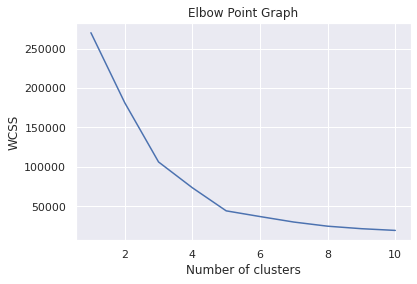

In [81]:
#plotting an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* After 5 there is no significant drop so the number of correct clusters is 5 .
* Optimum number of clusters will be 5

# training the K-means clustering model

In [82]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

Return a label for each data point based on their cluster
ie 0,1,2,3,4

In [83]:
y=kmeans.fit_predict(x)
#returns a cluster number to each data point

In [84]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

#Visualising Clusters

In [85]:
#plot data along with their cluster number , amt spend , etc
#x-annual income 
#y-spending score

#each centroid will be calculated and only 1 will be closer
#centroid will be plotted first then the data pts and the it will be checked that which centroid is closer to data pt then it will be rearranged

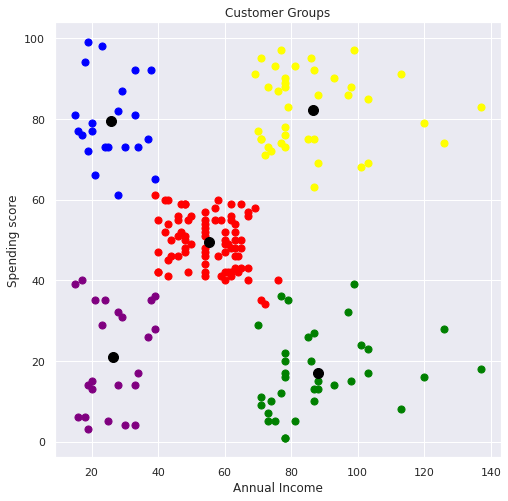

In [86]:
#plotting all the clusters and their centroid

plt.figure(figsize=(8,8))
#x[y==0,0] <-x co-ordinate<=annual income,x[y==0,1 <-y-co-ordinate <= spending score <= second column value.
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='blue',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='purple',label='cluster 5')

#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

#Observations

We have created 5 clusters 0,1,2,3,4,5
THe blue color cluster ie. cluster number 3 inclused customers dont have a very high anual income but their spending sxore is very good
Purple group - very less anual income and very less spending score as well which is understandable, bcz people will less anual income tend to purchase less in supermarket and malls
green - more annual income but dont spend muxh . cautious about ehat they are buying
yello - more annual income and spending a lot
'
Give offers to people who noy buing much 
Give offers and discoutns with membership cards
offers to green 
Improve customer satisafaction , mprove profit value improve market value
business insights

In [87]:
,,x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [88]:
df['class']=y

In [89]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),class
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [90]:
x=df.iloc[:,[3,4]]
y=df.iloc[:,-1]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [95]:
#training score
knn.score(xtrain,ytrain)

0.99375

In [96]:
knn.score(xtest,ytest)

0.975

In [97]:
trainac = []
testac = []

for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)

  trainac.append(knn.score(xtrain, ytrain))
  testac.append(knn.score(xtest, ytest))

In [98]:
dic = {
    "n":np.arange(1,10),
    "train":trainac,
    "test":testac
}

hp = pd.DataFrame(dic)
hp

,n,train,test
0,1,1.00000,1.000
1,2,0.97500,0.950
2,3,0.98125,0.950
3,4,0.97500,0.950
4,5,0.99375,0.975
5,6,0.98750,0.950
6,7,0.98750,1.000
7,8,0.99375,0.975
8,9,0.98750,0.975


In [99]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [100]:
knn.score(xtrain,ytrain)

0.975

In [101]:
knn.score(xtest,ytest)

0.95

In [102]:
ypred=knn.predict(xtest)

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         4
           4       1.00      0.80      0.89         5

    accuracy                           0.95        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



#Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [107]:
dt.score(xtrain,ytrain)

1.0

In [ ]:
dt.score(xtest,ytest)

0.975

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [ ]:
grid_search.best_score_

0.9875

In [108]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=2,
                       min_samples_split=3, splitter='random')

In [109]:
dt.score(xtrain,ytrain)

0.975

In [110]:
dt.score(xtest,ytest)

0.975

In [111]:
ypred=dt.predict(xtest)

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        16
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         4
           4       1.00      0.80      0.89         5

    accuracy                           0.97        40
   macro avg       0.99      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [113]:
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x864 with 0 Axes>

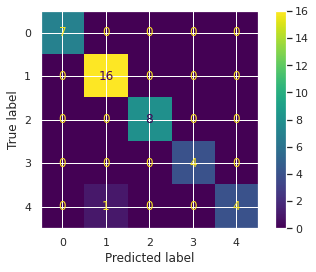

In [116]:
plt.figure(figsize=(10,12))
plot_confusion_matrix(dt,xtest,ytest,)